# 阅读笔记

** 作者：方跃文 **

** Email: fyuewen@gmail.com **

** 时间：始于2017年9月12日， 结束写作于 **

** 第四章笔记始于2018年1月6日，结束于2018年_____**



# 第五章 pandas 入门

** 时间： 2017年1月6日清晨**

panas 是原书作者Wes Mckinney主要想讨论的library，毕竟Mckinney本人就是pandas的开发者。pandas可以帮助数据分析工作，特别是在处理高级数据结构时候，pandas可以简化这些复杂的工作。pandas是基于NumPy构建的，因此会让以NumPy为中心的应用变得更加简单。尽管Pandas的构建哲学基于Numpy，但是两者也是有一处显著差别的，即
**
While pandas adopts many coding idioms from NumPy, the biggest difference is that pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneous numerical array data.**

Pandas其实是Mckinney在AQR量化投资管理公司任职时候开始编写的，最初他是为了满足工作需求才编写的。之后Pandas不断壮大，使得功能越来越丰富。不过Mckinney也认为后来的Pandas有点违背了自己的初衷，因为他其实是希望它能保留简介性和易用性。

在本书中，我们做如下的约定，即

In [1]:
from pandas import Series, DataFrame

In [2]:
import pandas as pd

这有点像之前那样的，我们约定 np 代表 numpy。因为 Series 和 DataFrame 用的次数非常多，所以将其引入命名空间会更加方便

## Pandas的数据结构介绍

要想顺畅得使用pandas，就必须熟悉它的两个主要数据结构：Series 和 DataFrame。虽然它们并不能解决所有问题，不过它们为大多数应用提供了一种可靠的，易于使用的基础。

### Series

Series 是一种类似于一维数组的对象，它由一组数据（各种NumPy数据类型）以及一组与之相关的数据标签（即索引）组成。仅有一组数据即可产生最简单的Series。

例如：

In [2]:
from pandas import Series

obj = Series([4, 5, 2, -4])

In [3]:
obj

0    4
1    5
2    2
3   -4
dtype: int64

In [7]:
obj2=obj+obj
obj2

0     8
1    10
2     4
3    -8
dtype: int64

从上面我们可以看到，Series 的字符串表现形式为：索引在左边，值在右边。因为我们上面没有为数据指定特殊的索引，所以系统会自动创建一个 0 到 N-1 （N为数据的长度）的整数型索引。你可以通过 Series 的 values 和 index 属性获取数组表示形式和索引对象：

In [6]:
obj.values

array([ 4,  5,  2, -4])

In [7]:
obj.index # 注意，如果使用python 2，显示的结果可能在形式上有点不同。

RangeIndex(start=0, stop=4, step=1)

大部分情况下，我们更希望去定制索引，以方便我们的使用。例如

In [9]:
obj2 = Series([4, 5, 2 ,-4], index=['d', 'b', 
                                    'a', 'c'])

In [10]:
obj2.values

array([ 4,  5,  2, -4])

In [11]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [12]:
obj2['a']

2

我们可以看到上面，与普通的numpy数组相比，我们可以通过索引的方式选取Series中的单个或者一组值。

In [14]:
obj2[['a', 'b']]

a    2
b    5
dtype: int64

In [35]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

obj11 = Series(np.arange(10))
print('value of obj11 is', obj11.values)
print('index of obj11 is', obj11.index)

obj13 = Series([1,2,3,4], index=['a','b','c','d'])
print('index of obj13 is', obj13.index)
print('value of obj13 is', obj13.values)
print('print the values that are large than 3\n', obj13[obj13>2])
print(obj13['b'])
print(obj13[['b','c']])
print(obj11[2])

obj13=obj13*2
print(obj13)

value of obj11 is [0 1 2 3 4 5 6 7 8 9]
index of obj11 is RangeIndex(start=0, stop=10, step=1)
index of obj13 is Index(['a', 'b', 'c', 'd'], dtype='object')
value of obj13 is [1 2 3 4]
print the values that are large than 3
 c    3
d    4
dtype: int64
2
b    2
c    3
dtype: int64
2
a    2
b    4
c    6
d    8
dtype: int64


通过上面我们可以看出，pandas中的数组操作，都会保留索引和值之间的链接。

此外，还可以将Series看成一个定长的有序字典，因为它是索引值到数据值的一个映射。它可以用在许多原本需要字典参数的函数中：

In [38]:
'b' in obj13

True

In [39]:
'e' in obj13

False

如果数据被存放在一个python字典中，也可以直接通过这个字典创建Series, 特别地，如果只传入一个字典，则Series中得到的索引就是原始字典中的键（有序排列）

In [43]:
sdata = {'Kyoto': 35000, "Tokyo": 40000, "Sendai": 30000, "Nagoya": 45000}
sdata

{'Kyoto': 35000, 'Nagoya': 45000, 'Sendai': 30000, 'Tokyo': 40000}

In [54]:
obj4 = Series(sdata)
print(obj4)

Kyoto     35000
Nagoya    45000
Sendai    30000
Tokyo     40000
dtype: int64


In [52]:
cities = ['Kyoto', 'Osaka', 'Sendai', 'Nagoya']
obj5=Series(sdata, index=cities)
print(obj5)

Kyoto     35000.0
Osaka         NaN
Sendai    30000.0
Nagoya    45000.0
dtype: float64


在上例中，sdata 中跟cities索引相匹配的三个值会被找出来并放到相应的位置上，但是由于Osaka所对应的sdata值没有找到，所以它的值为NaN，即非数字（not a number）。在Pandas中，它用于表示确实或NA值。本书中，我们使用missing或者NA表示缺失的数据。pandas的 isnull 和 notnull 函数可以用于检测缺失数据。

In [55]:
pd.isnull(obj5)

Kyoto     False
Osaka      True
Sendai    False
Nagoya    False
dtype: bool

In [56]:
pd.notnull(obj5)

Kyoto      True
Osaka     False
Sendai     True
Nagoya     True
dtype: bool

Series 也有类似的实例方法：

In [58]:
obj5.isnull()

Kyoto     False
Osaka      True
Sendai    False
Nagoya    False
dtype: bool

In [57]:
obj5.notnull()

Kyoto      True
Osaka     False
Sendai     True
Nagoya     True
dtype: bool

在这一章节之后的内容中，我们将详细讲解如何处理缺失数据。

对于许多应用而言，Series最重要的功能之一就是，它在算术运算中会自动对其不同索引的数据。这句话不太好理解，我们可以通过看下面的例子加深了解。

In [59]:
obj4

Kyoto     35000
Nagoya    45000
Sendai    30000
Tokyo     40000
dtype: int64

In [60]:
obj5

Kyoto     35000.0
Osaka         NaN
Sendai    30000.0
Nagoya    45000.0
dtype: float64

In [62]:
obj5+obj4

Kyoto     70000.0
Nagoya    90000.0
Osaka         NaN
Sendai    60000.0
Tokyo         NaN
dtype: float64

关于数据对其的功能，我们之后还会详细介绍，此处暂时跳过。

Series 对象本身以及索引都有一个name属性，该属性跟pandas其他的关键功能关系非常密切：

In [71]:
obj4.name = 'population'

In [72]:
obj4.index.name = 'cities'

In [73]:
obj4

cities
Kyoto     35000
Nagoya    45000
Sendai    30000
Tokyo     40000
Name: population, dtype: int64

In [66]:
obj5.name = 'area'

In [67]:
obj5.index.name = 'cities'

In [68]:
obj5

cities
Kyoto     35000.0
Osaka         NaN
Sendai    30000.0
Nagoya    45000.0
Name: area, dtype: float64

我们可以通过直接赋值的方式来修改Series的索引

In [70]:
obj5.index=['A', 'B', 'C', 'D']
print(obj5.index)
print(obj5)

Index(['A', 'B', 'C', 'D'], dtype='object')
A    35000.0
B        NaN
C    30000.0
D    45000.0
Name: area, dtype: float64


### DataFrame

DataFrame是一个表格型的数据结构。它既有行索引也有列索引，所以可以被看作是由Series组成的字典。跟其他类似的数据结构（如R的data.frame)比较，DataFrame中面向行和面向列的操作基本上是平衡的。Pandas中的DataFrame区别于一般python对象（如列表、字典等一维数据结构）的地方在于，它往往以一个或者多个二维块存放。DataFrame的内部技术细节十分复杂，作者说它的复杂程度远超于本书，所以不会做讨论，而只是讨论如何应用它。

虽然DataFrame以二维数据块的方式保存数据，但是我们在实际中还是可以轻松将这它们表示为更高维度的数据。**表格型数据的特征是层次化索引**，这是pandas高级数据处理中需要利用的关键要素。我们之后会讨论这方面的应用

构建DataFrame的方法有很多，最常用的是一种直接传入一个由等长列表或者NumPy数组组成的字典，例如

In [2]:
import pandas as pd
from pandas import DataFrame, Series

In [3]:
data = {'province':['Zhejiang', 'Zhejiang', 'Zhejiang', 'Hubei', 'Hubei'],'area':[101,101,101,185,185],
       'pop':[98,98,98,100,100]}

In [5]:
frame1 = DataFrame(data)
frame1

,area,pop,province
0,101,98,Zhejiang
1,101,98,Zhejiang
2,101,98,Zhejiang
3,185,100,Hubei
4,185,100,Hubei


我们可以看到像Series一样，索引被自动加上，并且字典中的数据都被有序地排列。

如果我们指定列序列，那么DataFrame的列就会按照指定顺序进行排列：

In [6]:
DataFrame(data, columns=['province','area', 'pop'])

,province,area,pop
0,Zhejiang,101,98
1,Zhejiang,101,98
2,Zhejiang,101,98
3,Hubei,185,100
4,Hubei,185,100


同Series相同，如果传入的列在数据中是没有的，那么返回的也是NA值。

In [7]:
frame2 = DataFrame(data,columns=['province', 'pop', 'area', 'history'],index=[1,2,3,4,5])
frame2

,province,pop,area,history
1,Zhejiang,98,101,NaN
2,Zhejiang,98,101,NaN
3,Zhejiang,98,101,NaN
4,Hubei,100,185,NaN
5,Hubei,100,185,NaN


In [8]:
frame2.columns

Index(['province', 'pop', 'area', 'history'], dtype='object')

In [9]:
frame2.index

Int64Index([1, 2, 3, 4, 5], dtype='int64')

通过类似字典标记的方式或属性的方式，可以将DataFrame中的列获取为一个Series

In [10]:
frame2['province']  #标记方式

1    Zhejiang
2    Zhejiang
3    Zhejiang
4       Hubei
5       Hubei
Name: province, dtype: object

In [11]:
frame2.province #属性方式

1    Zhejiang
2    Zhejiang
3    Zhejiang
4       Hubei
5       Hubei
Name: province, dtype: object

我们可以看出来，这个新得到的Series具有与原来DataFrame相同的索引，并且name属性也已经被相应地设置好了。

DataFrame中的行也可以通过位置或者名称的方式进行获取，例如，我们用索引字段ix：

In [13]:
frame2.ix[3]

province    Zhejiang
pop               98
area             101
history          NaN
Name: 3, dtype: object

列可以通过赋值的方式进行修改。例如，我们可以修改frame2中NaN的history列

In [21]:
frame2['history']=2000

In [22]:
frame2

,province,pop,area,history
1,Zhejiang,98,101,2000
2,Zhejiang,98,101,2000
3,Zhejiang,98,101,2000
4,Hubei,100,185,2000
5,Hubei,100,185,2000


将列表或数组赋值给某个列时，它的长度必须和DataFrame中的长度相匹配(其实就是不能超过原DataFrame中的长度)。如果赋值的是一个Series，就会精确匹配DataFrame中的索引，所欲的空位都将被填上缺失值：

In [23]:
val = Series([2000,3000,2100],index=[1,3,5])

In [24]:
frame2['history']=val

In [25]:
frame2 #index 1，3，5的 被改变了，2和4因为在val中是没有的，所以填入的是NaN

,province,pop,area,history
1,Zhejiang,98,101,2000.0
2,Zhejiang,98,101,NaN
3,Zhejiang,98,101,3000.0
4,Hubei,100,185,NaN
5,Hubei,100,185,2100.0


通过为不存在的列赋值，我们可以给DataFrame增加列，例如

In [29]:
frame2['estern']=frame2.province=="Zhejiang" #将boolean value赋值给estern这个列

In [30]:
frame2 #我们看到frame2中的确增加了一个estern列

,province,pop,area,history,estern
1,Zhejiang,98,101,2000.0,True
2,Zhejiang,98,101,NaN,True
3,Zhejiang,98,101,3000.0,True
4,Hubei,100,185,NaN,False
5,Hubei,100,185,2100.0,False


我们还可以利用 del 这个关键字来对列进行删除

In [31]:
del frame2['estern']

In [33]:
frame2.columns # estern coulumn was delted 

Index(['province', 'pop', 'area', 'history'], dtype='object')

In [38]:
frame2["area"]=frame2["area"]+1

In [39]:
frame2

,province,pop,area,history
1,Zhejiang,98,102,2000.0
2,Zhejiang,98,102,NaN
3,Zhejiang,98,102,3000.0
4,Hubei,100,186,NaN
5,Hubei,100,186,2100.0


**特别注意** 通过索引方式返回的列只是相应数据的视图而已，并不是副本。因此，对返回的Series所做的任何就地修改都会反映到源DataFrame中。通过Series的copy方法可以显示的赋值列。

此外，还有一种常见的数据形式是嵌套字典，也就是字典的字典：

In [55]:
pop = {'Nevada':{2001:2.4, 2002:2.9},
      'Ohio':{2000:1.5, 2001: 1.7, 2002:3.6}}

如果把它传给DataFrame，它会被解释为：外层字典的键作为列，内层的键则作为行索引

In [57]:
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


我们也可以对结果进行转置

In [58]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


内层字典的键会被合并、排序以形成最终的索引。如果显示指定了索引，则不会进行自动排序，例如：

In [65]:
DataFrame(pop, index=[2001,2002,2000])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [66]:
DataFrame(pop, columns=["Ohio", "Nevada"])

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


In [67]:
DataFrame(pop, columns=["Ohio", "Nevada"],index=[2002,2001,2000])

,Ohio,Nevada
2002,3.6,2.9
2001,1.7,2.4
2000,1.5,NaN


## Visualization

由于近来在处理计算材料的结果时用到了pandas数组的可视化，所以我查阅了pandas网站documentation中可视化的部分，因此在此增加了一个visualization的subsection。

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [3]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range(
    '1/1/2000', periods = 1000))

ts = ts.cumsum()

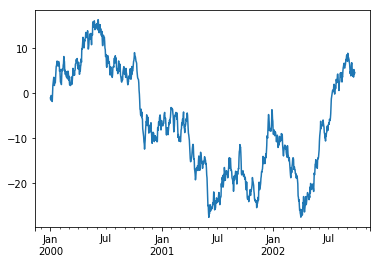

In [4]:
ts.plot()

In [5]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index = ts.index, columns = list('ABCD'))

In [6]:
df = df.cumsum()

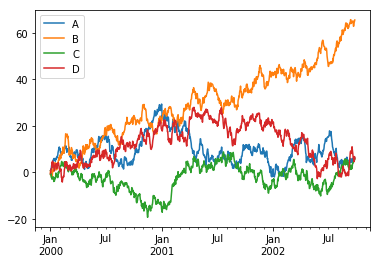

In [7]:
plt.figure(); df.plot();

In [8]:
df3 = pd.DataFrame(np.random.randn(1000,2), columns
                   = ['B', 'C']).cumsum()

In [9]:
df3['A'] = pd.Series(list(range(len(df))))

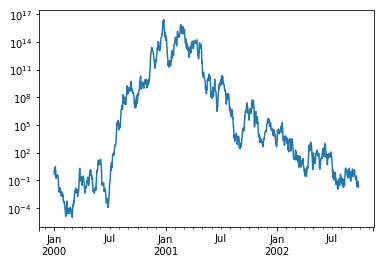

In [10]:
#pass logy to get a log-scale y-axis
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = np.exp(ts.cumsum())
ts.plot(logy=True)

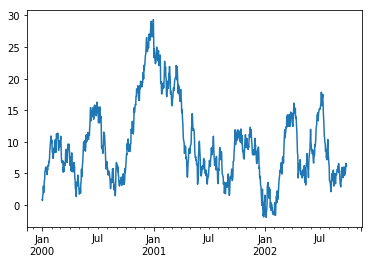

In [11]:
df.A.plot()

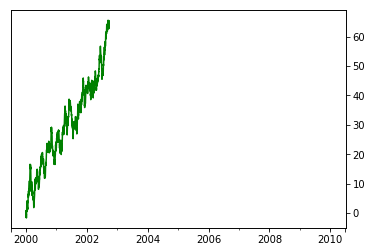

In [12]:
df.B.plot(secondary_y=True, style='g')

## Pandas for data analysis | scipy 2017 Tutorial | Dainiel Chen

In 2017, Dainiel Chen gave a very nice presentation in SciPy meeting. I watched his vedio in the (youtube)[https://www.youtube.com/watch?v=oGzU688xCUs], hence I added some note in this section. All the imported files mentioned in this section can be found in Chen's github (repo.)[https://github.com/chendaniely/scipy-2017-tutorial-pandas]. For my convenience, I moved the folder 'data' in his repo to chapter05 in my current repo.

In [1]:
import pandas as pd

In [2]:
#check the version of the padas you are using
pd.__version__

'0.21.0'

In [3]:
print('the version of pandas in my computer is', pd.__version__)

the version of pandas in my computer is 0.21.0


In [4]:
pd.read_csv('./chapter05/data/gapminder.tsv', delimiter='\t').head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [5]:
pd.read_csv('./chapter05/data/gapminder.tsv', delimiter='\t').head() # 如果括号中不指定，默认是5，所以只打印出表格的前面五行

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [6]:
#let us specify df for the imported file
df = pd.read_csv("./chapter05/data/gapminder.tsv", delimiter='\t')

In [7]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [8]:
df.head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.shape

(1704, 6)

In [20]:
df.shape() #you will see an error because as you see above, df.shape is a tuple

TypeError: 'tuple' object is not callable

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
